STANDARD SCALING

In [ ]:
import pandas as pd

# Loading the cleaned dataset
file_path = 'cleaned_CKD_dataset.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print(data.head())


     Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  137.53  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1  


In [ ]:
from sklearn.preprocessing import StandardScaler

# Removing non-numeric columns if present and scale the data
X = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Checking scaled data
print(X_scaled[:5])


[[ 0.26337923  0.4214856  -0.01180416 -0.38026942  0.36488968 -0.44673018
  -0.46255585 -0.13879466  0.30810558  1.07970274 -0.2405058   0.53219091
   1.30997921  0.77459667]
 [-1.96549998  0.4214856   2.34902872 -0.38026942  0.36488968 -0.95673657
  -0.61178547 -0.13879466  0.30810558 -0.5135386  -0.95477338 -0.24201987
  -0.76720974  0.77459667]
 [ 0.26337923 -1.4210744   0.77514013  2.50785277  0.36488968  0.03494252
  -0.23871143 -0.13879466  0.30810558 -1.17415086 -0.3595504  -0.24201987
  -0.76720974  0.77459667]
 [-0.47958051 -2.3423544   2.34902872 -0.38026942  0.36488968  0.11994359
   0.50743666 -0.13879466 -2.95000477 -0.55239814 -0.67700265 -1.5218377
   1.30997921  0.77459667]
 [ 0.26337923 -1.4210744   0.77514013 -0.38026942  0.36488968 -0.73006707
  -0.38794104 -0.13879466  0.30810558 -0.39695996 -0.43891346 -0.41582229
  -0.76720974  0.77459667]]


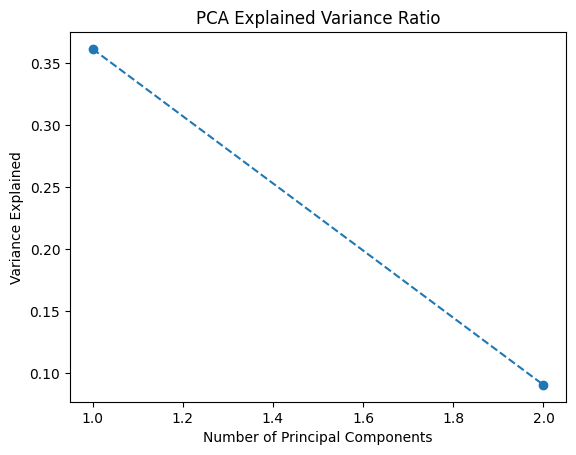

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the explained variance ratio
plt.figure()
plt.plot(range(1, 3), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('PCA Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

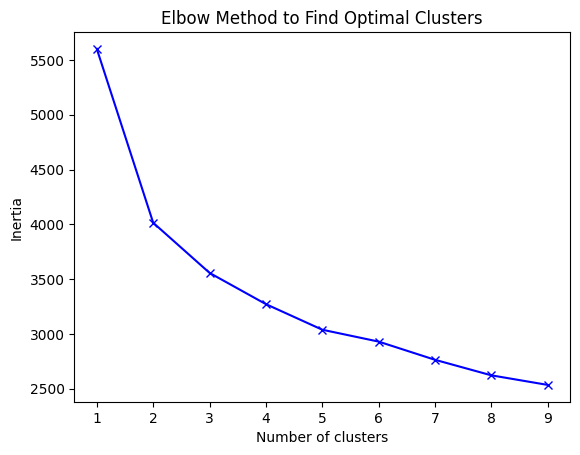

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Elbow method to find optimal number of clusters
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal Clusters')
plt.show()


In [ ]:
# Fitting the model with the optimal number of clusters (based on the Elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original dataset
data['Cluster'] = clusters

# Display cluster centroids
print(kmeans.cluster_centers_)


[[ 0.52990129 -0.4997944   1.06243725  0.30737872 -0.81813663  1.63943882
   1.73265918 -0.87761731  0.36686276 -1.19962545  0.00267271 -0.44942911
   0.98026668  0.77459667]
 [-0.37457553  0.85141627 -0.77251698 -0.38026942  0.36488968 -0.51000875
  -0.55868459  0.64985106 -0.12375976  0.95607757 -0.26499724  0.76571817
  -0.75696227 -1.29099445]
 [ 0.12193876 -0.51457429  0.26173262  0.20147355 -0.01706334 -0.14322638
  -0.13558738 -0.22560304 -0.02432295 -0.36275525  0.2116642  -0.46280049
   0.27693872  0.77459667]]


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


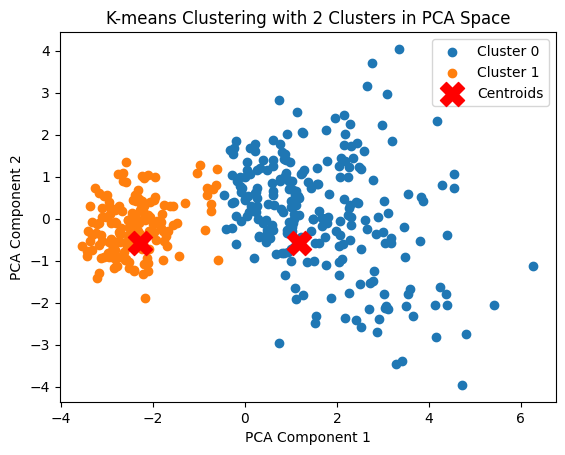

In [ ]:
# Performing K-means clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(X_scaled)

# Projecting the original centroids for 2 clusters into the PCA space
centroids_2_pca = pca.transform(kmeans_2.cluster_centers_)

# Plotting the clusters and centroids for 2 clusters in PCA space
plt.figure()
for cluster in range(2):
    plt.scatter(X_pca[clusters_2 == cluster, 0], X_pca[clusters_2 == cluster, 1], label=f'Cluster {cluster}')
    
# Plotting the centroids in the PCA-transformed space
plt.scatter(centroids_2_pca[:, 0], centroids_2_pca[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('K-means Clustering with 2 Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()



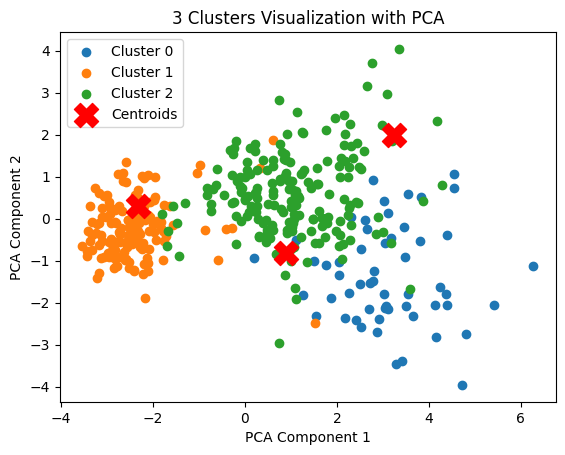

In [ ]:
# Calculating the K-means centroids in the original high-dimensional space
centroids_original_space = kmeans.cluster_centers_

# Transform the centroids to the PCA space
centroids_pca = pca.transform(centroids_original_space)

# Plotting the clusters with the correctly transformed centroids
plt.figure()
for cluster in range(kmeans.n_clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
    
# Plotting the centroids in the PCA-transformed space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('3 Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


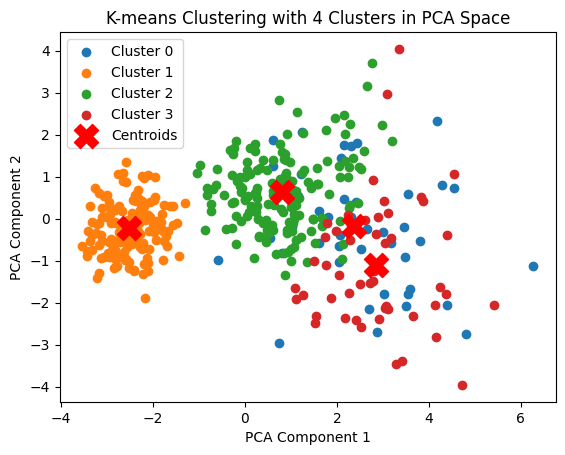

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Performing K-means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_scaled)

# Projecting the original centroids for 4 clusters into the PCA space
centroids_4_pca = pca.transform(kmeans_4.cluster_centers_)

# Plotting the clusters and centroids for 4 clusters in PCA space
plt.figure()
for cluster in range(4):
    plt.scatter(X_pca[clusters_4 == cluster, 0], X_pca[clusters_4 == cluster, 1], label=f'Cluster {cluster}')
    
# Plotting the centroids in the PCA-transformed space
plt.scatter(centroids_4_pca[:, 0], centroids_4_pca[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('K-means Clustering with 4 Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


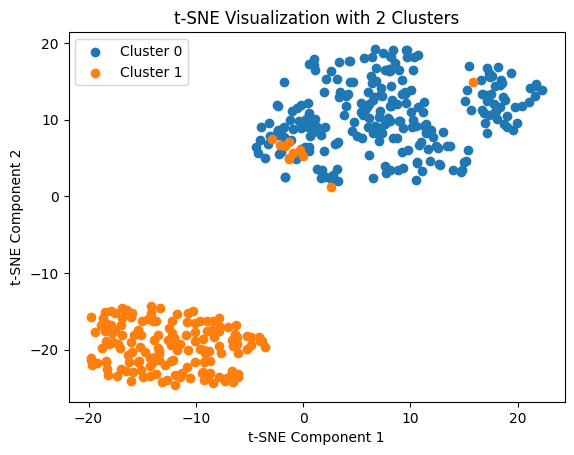

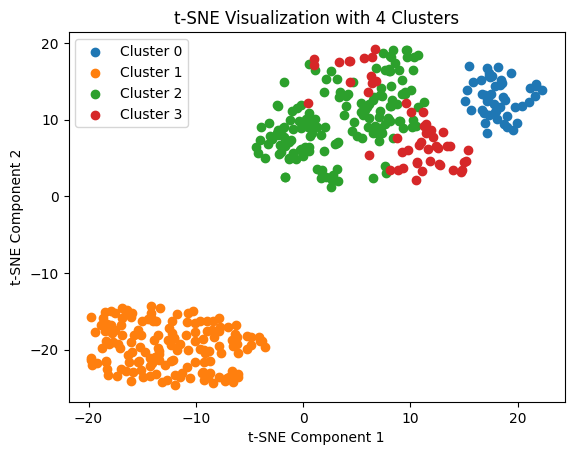

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defining and fitting K-means with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(X_scaled)

# Defining and fitting K-means with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_scaled)

# Applying t-SNE
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting t-SNE results with 2 clusters
plt.figure()
for cluster in range(2):
    plt.scatter(X_tsne[clusters_2 == cluster, 0], X_tsne[clusters_2 == cluster, 1], label=f'Cluster {cluster}')
plt.title('t-SNE Visualization with 2 Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

# Plotting t-SNE results with 4 clusters
plt.figure()
for cluster in range(4):
    plt.scatter(X_tsne[clusters_4 == cluster, 0], X_tsne[clusters_4 == cluster, 1], label=f'Cluster {cluster}')
plt.title('t-SNE Visualization with 4 Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


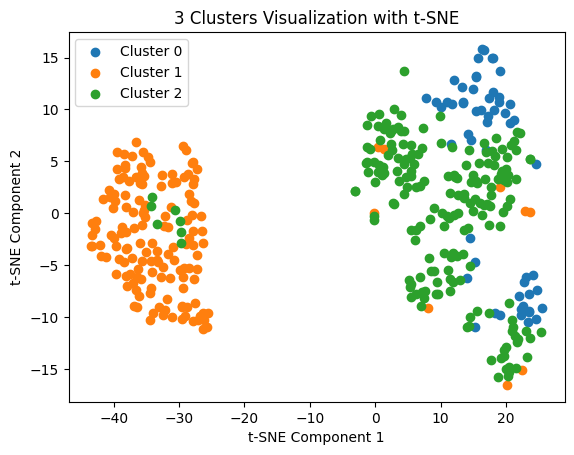

In [ ]:
from sklearn.manifold import TSNE

# Applying t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Scattering plot for t-SNE
plt.figure()
for cluster in range(kmeans.n_clusters):
    plt.scatter(X_tsne[clusters == cluster, 0], X_tsne[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('3 Clusters Visualization with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 2 clusters: 0.25602215355791097


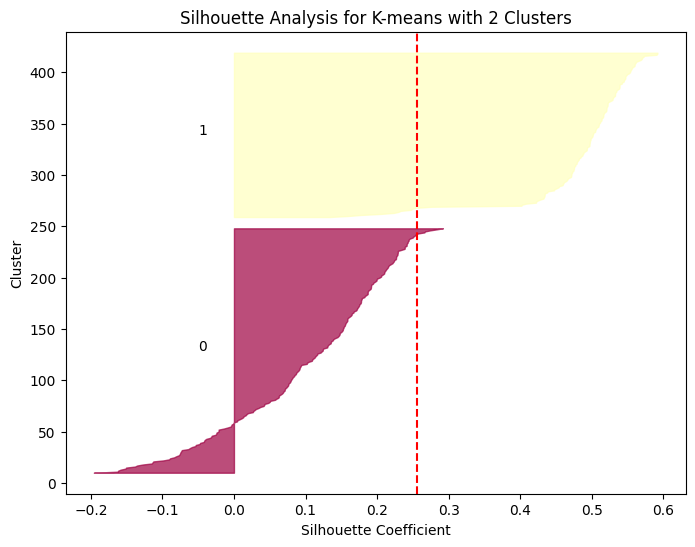

c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 3 clusters: 0.23957646510137512


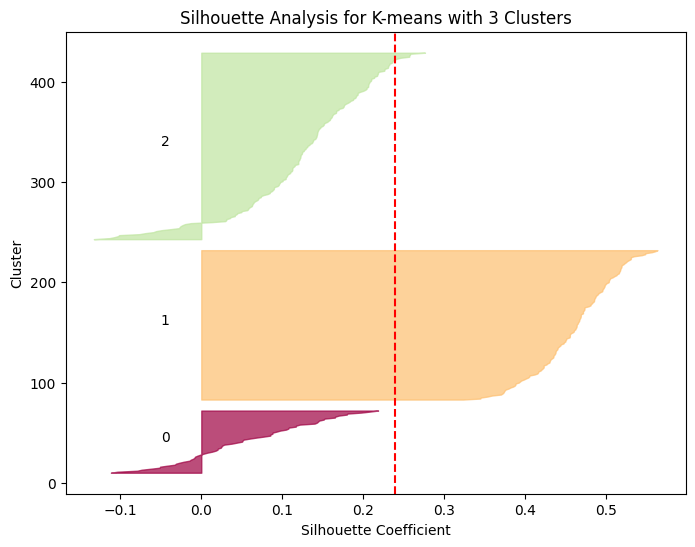

c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 4 clusters: 0.24521398971086406


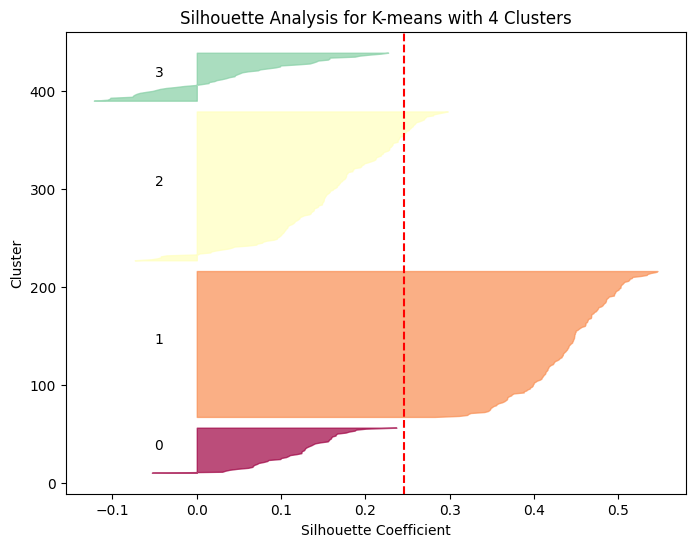

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Defining a function to plot silhouette analysis
def plot_silhouette_analysis(X, n_clusters, cluster_labels):
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    plt.figure(figsize=(8, 6))
    y_lower = 10
    for i in range(n_clusters):
        # Aggregating the silhouette scores for samples in cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Labeling the silhouette plot with cluster numbers in the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.title(f"Silhouette Analysis for K-means with {n_clusters} Clusters")
    plt.show()

# Applying KMeans and silhouette analysis for 2, 3, and 4 clusters
for n_clusters in [2, 3, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    plot_silhouette_analysis(X_scaled, n_clusters, cluster_labels)


MINMAX SCALING

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Standard Scaling
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

# MinMax Scaling
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Run KMeans on both scaled datasets and compare silhouette scores for 3 clusters
kmeans_standard = KMeans(n_clusters=3, random_state=42)
labels_standard = kmeans_standard.fit_predict(X_standard_scaled)
silhouette_standard = silhouette_score(X_standard_scaled, labels_standard)

kmeans_minmax = KMeans(n_clusters=3, random_state=42)
labels_minmax = kmeans_minmax.fit_predict(X_minmax_scaled)
silhouette_minmax = silhouette_score(X_minmax_scaled, labels_minmax)

print(f'Silhouette Score with Standard Scaling: {silhouette_standard}')
print(f'Silhouette Score with MinMax Scaling: {silhouette_minmax}')


Silhouette Score with Standard Scaling: 0.23957646510137512
Silhouette Score with MinMax Scaling: 0.44527734106619776


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

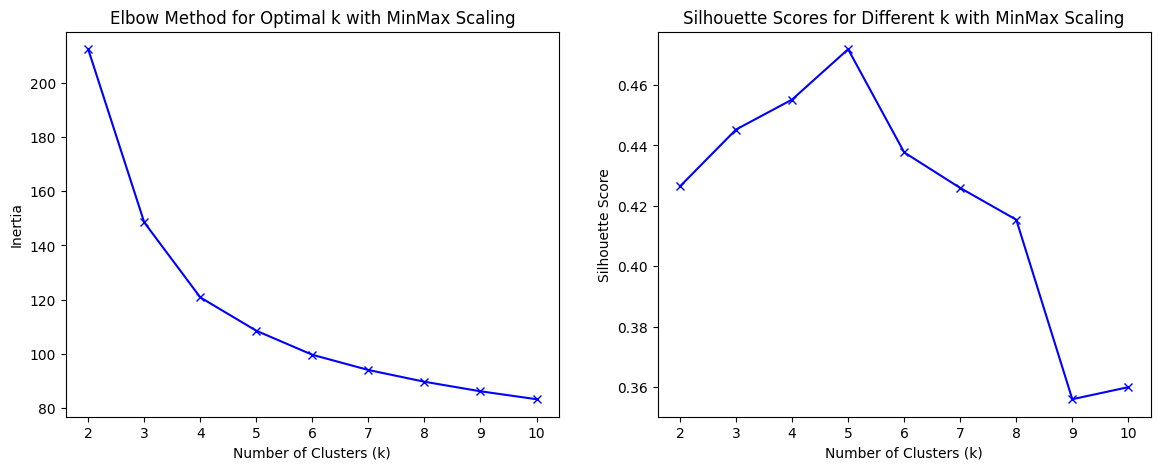

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Testing a range of cluster values for MinMax-scaled data
inertia_values = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_minmax_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_minmax_scaled, labels))

# Plotting the inertia and silhouette scores for MinMax scaling
plt.figure(figsize=(14, 5))

# Elbow plot (Inertia)
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k with MinMax Scaling')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k with MinMax Scaling')

plt.show()


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


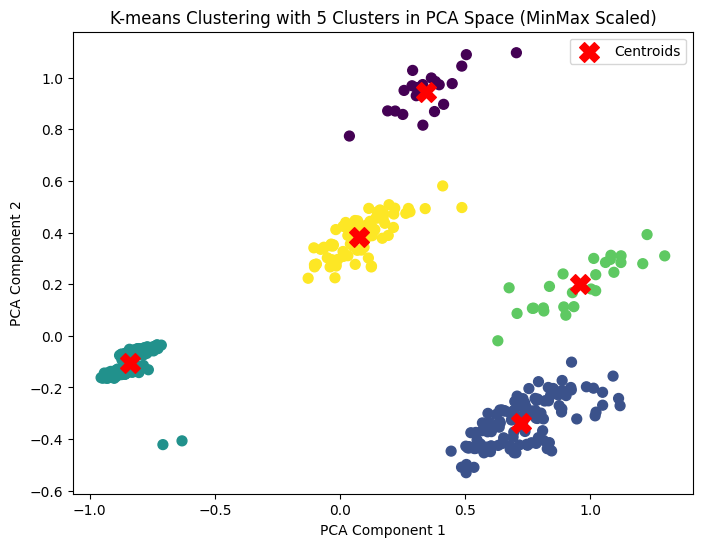

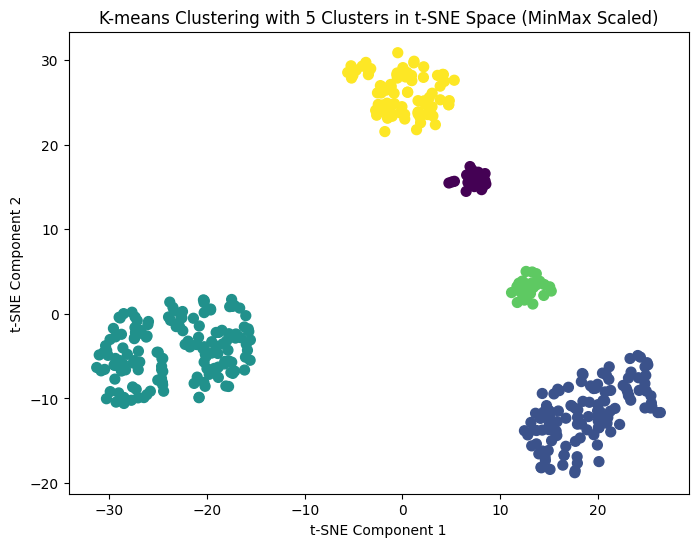

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

optimal_k = 5 

# Fit KMeans on MinMax-scaled data
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X_minmax_scaled)
centroids = kmeans_optimal.cluster_centers_

# PCA Visualization
pca = PCA(n_components=2)
X_pca_minmax = pca.fit_transform(X_minmax_scaled)
centroids_pca = pca.transform(centroids)  # Transform centroids to PCA space

# Plotting K-means clusters in PCA space with correct centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_minmax[:, 0], X_pca_minmax[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, label='Centroids', marker='X')
plt.title(f"K-means Clustering with {optimal_k} Clusters in PCA Space (MinMax Scaled)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne_minmax = tsne.fit_transform(X_minmax_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.title(f"K-means Clustering with {optimal_k} Clusters in t-SNE Space (MinMax Scaled)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


Silhouette Score for 5 clusters: 0.47185497810820803


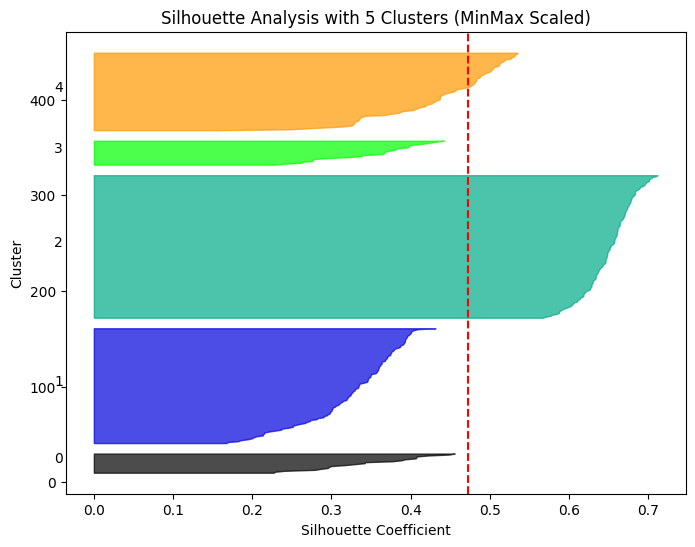

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def plot_silhouette(X, labels, n_clusters):
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X, labels)
    y_lower = 10
    plt.figure(figsize=(8, 6))

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.title(f"Silhouette Analysis with {n_clusters} Clusters (MinMax Scaled)")
    plt.show()

# Running silhouette analysis for optimal number of clusters
plot_silhouette(X_minmax_scaled, labels_optimal, optimal_k)


ROBUST SCALING

In [16]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv('cleaned_CKD_dataset.csv')

# Apply RobustScaler
robust_scaler = RobustScaler()
data_robust = robust_scaler.fit_transform(data)

print("RobustScaler applied. First 5 rows of scaled data:")
print(data_robust[:5])


RobustScaler applied. First 5 rows of scaled data:
[[ 0.2         0.          0.          0.          0.         -0.27350427
  -0.05        0.          0.          0.7704698  -0.24989691  1.25641026
   1.          0.        ]
 [-2.8         0.          1.5         0.          0.         -0.88888889
  -0.25        0.          0.         -0.33020134 -0.99216495  0.
   0.          0.        ]
 [ 0.2        -2.          0.5         3.          0.          0.30769231
   0.25        0.          0.         -0.78657718 -0.37360825  0.
   0.          0.        ]
 [-0.8        -3.          1.5         0.          0.          0.41025641
   1.25        0.         -2.6625     -0.35704698 -0.70350515 -2.07692308
   1.          0.        ]
 [ 0.2        -2.          0.5         0.          0.         -0.61538462
   0.05        0.          0.         -0.24966443 -0.45608247 -0.28205128
   0.          0.        ]]


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

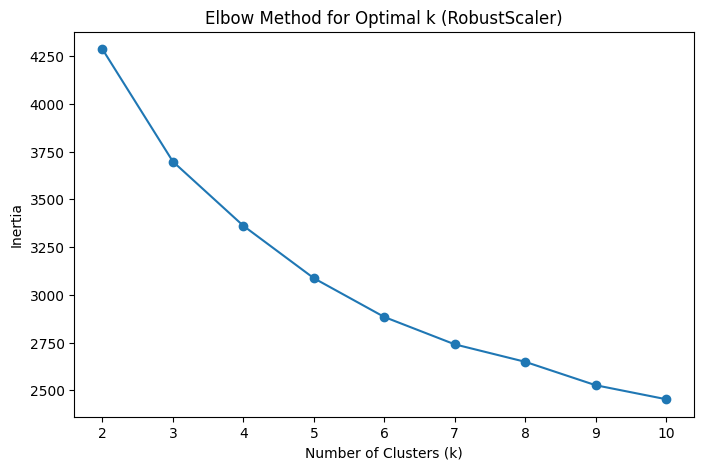

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
range_clusters = range(2, 11)  # Testing 2 to 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_robust)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (RobustScaler)')
plt.show()


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

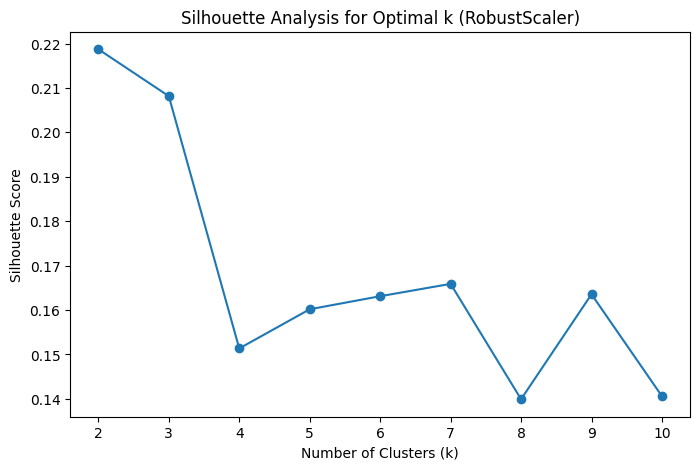

In [18]:
from sklearn.metrics import silhouette_score

# Silhouette Scores
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_robust)
    silhouette_scores.append(silhouette_score(data_robust, clusters))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k (RobustScaler)')
plt.show()


c:\Users\pande\anaconda3\envs\dmml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


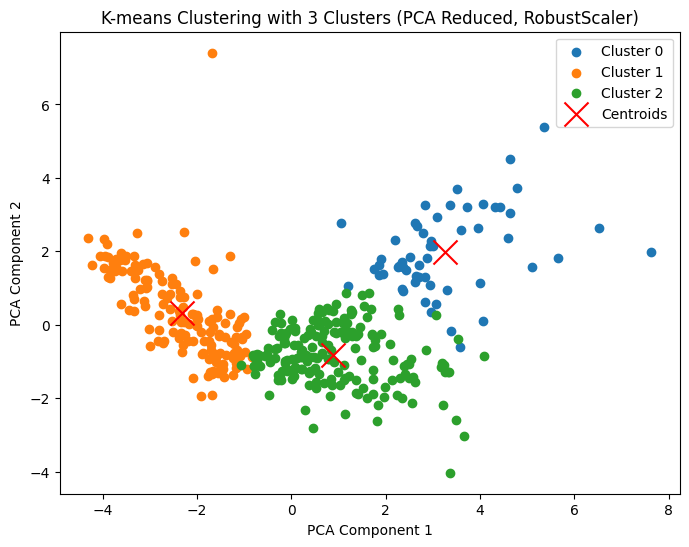

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Optimal number of clusters from silhouette analysis or elbow method
optimal_k = 3 

# Fit K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_robust)

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_robust)

# Transform centroids into PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot Clusters with Centroids
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(data_pca[clusters == cluster, 0], data_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-means Clustering with {optimal_k} Clusters (PCA Reduced, RobustScaler)')
plt.legend()
plt.show()


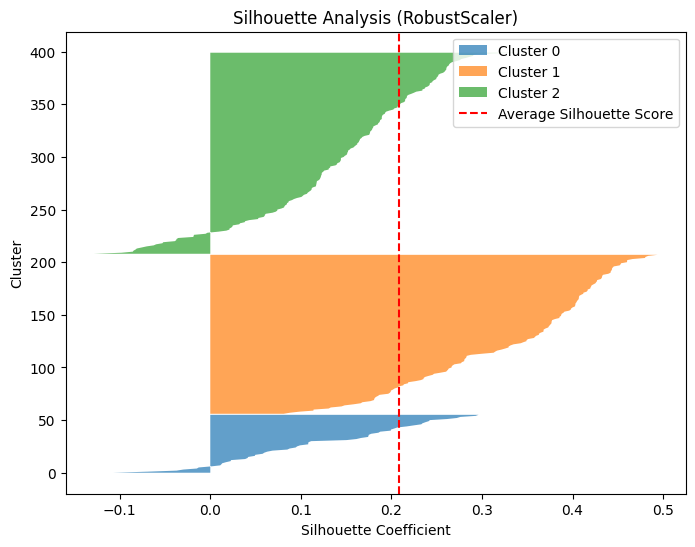

In [20]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# Visualizing Silhouette Scores for Optimal Clusters
silhouette_vals = silhouette_samples(data_robust, clusters)

y_lower, y_upper = 0, 0
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower += len(cluster_silhouette_vals)

plt.axvline(silhouette_score(data_robust, clusters), color="red", linestyle="--", label="Average Silhouette Score")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Analysis (RobustScaler)")
plt.legend()
plt.show()
